# HEART DISEASE ANALYSIS

Cardiovascular disease or heart disease describes a range of conditions that affect your heart. Diseases under the heart disease umbrella include blood vessel diseases, such as coronary artery disease. From WHO statistics every year 17.9 million dying from heart disease. The medical study says that human life style is the main reason behind this heart problem. Apart from this there are many key factors which warns that the person may/maynot getting chance of heart disease.



From the dataset if we create suitable machine learning technique which classify the heart disease more accurately, it is very helpful to the health organisation as well as patients.

## About the Datset

This dataset gives the information realated to heart disease. Dataset contain 13 columns, target is the class variable which is affected by other 12 columns. Here the aim is to classify the target variable to (disease\non disease) using different machine learning algorithm and findout which algorithm suitable for this dataset.

Attribute Information
• Sex: male or female(Nominal)<br>
• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age <br> is continuous)
Behavioral<br>
• Current Smoker: whether or not the patient is a current smoker (Nominal)<br>
• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one <br> can have any number of cigarettes, even half a cigarette.)<br>
Medical( history)<br>
• BP Meds: whether or not the patient was on blood pressure medication (Nominal)<br>
• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)<br>
• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)<br>
• Diabetes: whether or not the patient had diabetes (Nominal)<br>
Medical(current)<br>
• Tot Chol: total cholesterol level (Continuous)<br>
• Sys BP: systolic blood pressure (Continuous)<br>
• Dia BP: diastolic blood pressure (Continuous)<br>
• BMI: Body Mass Index (Continuous)<br>
• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet <br> considered continuous because of large number of possible values.)<br>
• Glucose: glucose level (Continuous)<br>
Predict variable (desired target)<br>
• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)<br>

In [1]:
# Importing the basic neccesary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [126]:
import warnings
warnings.filterwarnings("ignore")

In [72]:
# Reading the Dataset

data = pd.read_csv(r"C:\Users\APJ\Downloads\framingham.csv")

In [73]:
# Top 5 rows of the dataset

data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [74]:
#Random 5 Rows from the dataset

data.sample(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
535,1,43,1.0,0,0.0,0.0,0,0,0,245.0,105.0,59.5,30.55,85.0,77.0,0
3968,0,42,2.0,0,0.0,0.0,0,0,0,172.0,120.5,80.0,19.93,80.0,61.0,0
2792,0,36,3.0,1,15.0,0.0,0,0,0,180.0,105.0,60.0,25.97,102.0,NaN,0
3434,1,51,1.0,1,9.0,0.0,0,0,0,255.0,115.0,67.0,26.97,83.0,58.0,0
1958,0,43,3.0,0,0.0,0.0,0,0,0,192.0,107.5,67.5,21.22,67.0,NaN,0


In [75]:
# Shape of the data

data.shape

(4238, 16)

## Data Preprocessing

### Handling Missing Data 

In [76]:
# Checking for missing data in the dataset

data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

###### Visualizing Missing Data

<AxesSubplot:>

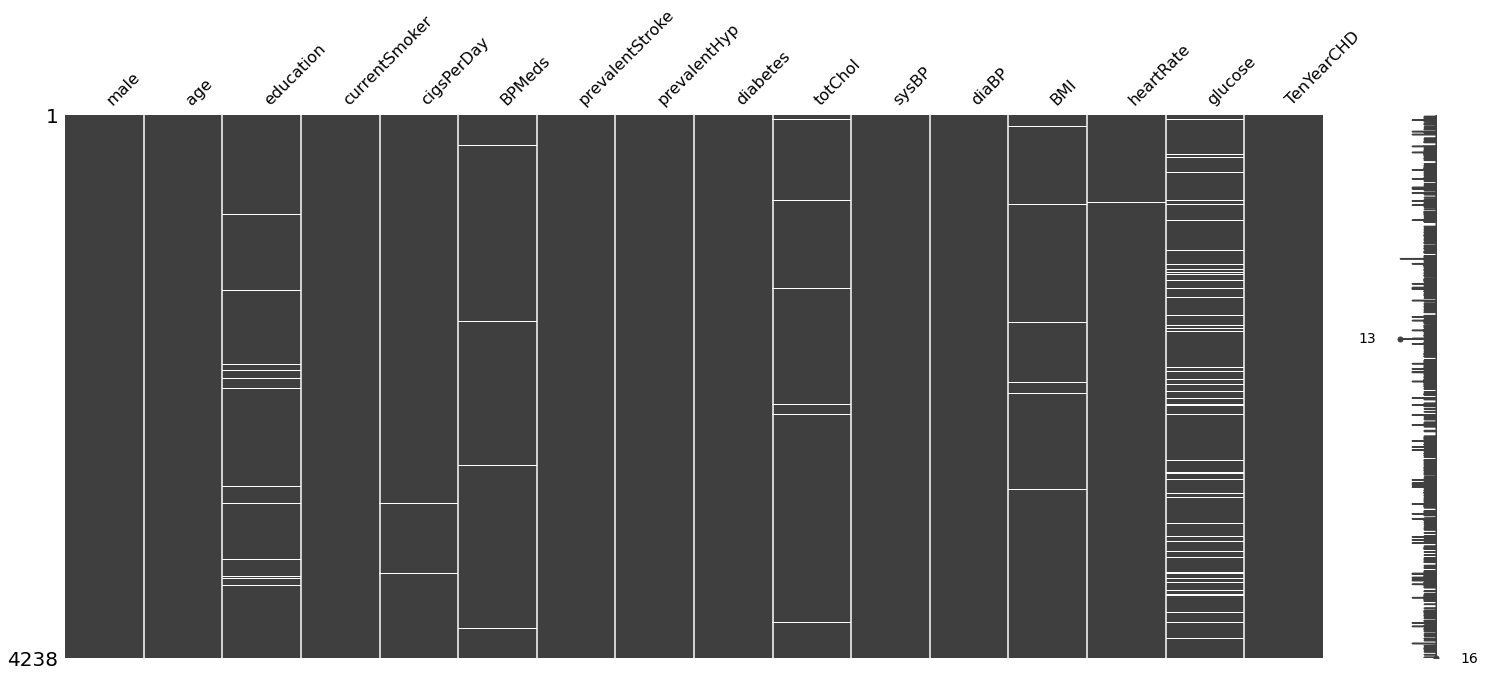

In [77]:
# pip install missingno

import missingno as msno #Library for visualizing missing Data
msno.matrix(data)

<AxesSubplot:>

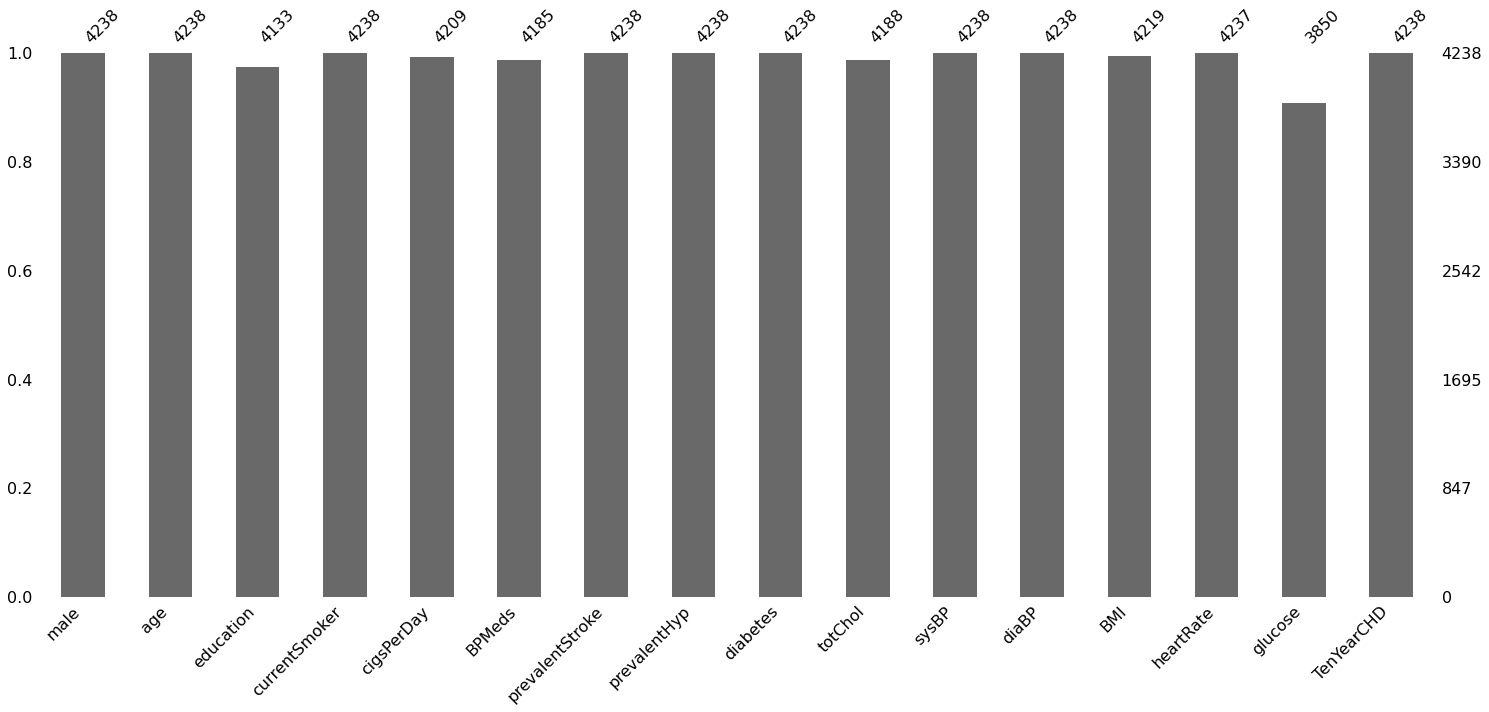

In [78]:
msno.bar(data)

In [ ]:
# There are several columns in the dataset with missing values, we will deal with them one by one

###### Missing Values in Educational Column 

<AxesSubplot:xlabel='education', ylabel='count'>

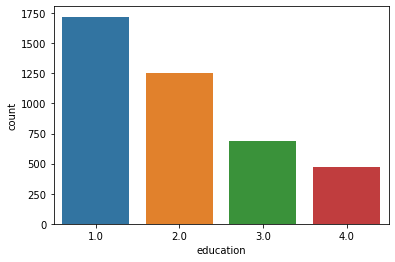

In [79]:
sns.countplot(x = data['education'])

In [80]:
# Handling missing Data in Educational Column,
# Guessing the education of person using his/her medical data does not make sense, hence we can fill up the missing data
# using mode.

data['education'].fillna(data['education'].mode()[0],inplace=True)

###### Missing Values in Cigars per day Column

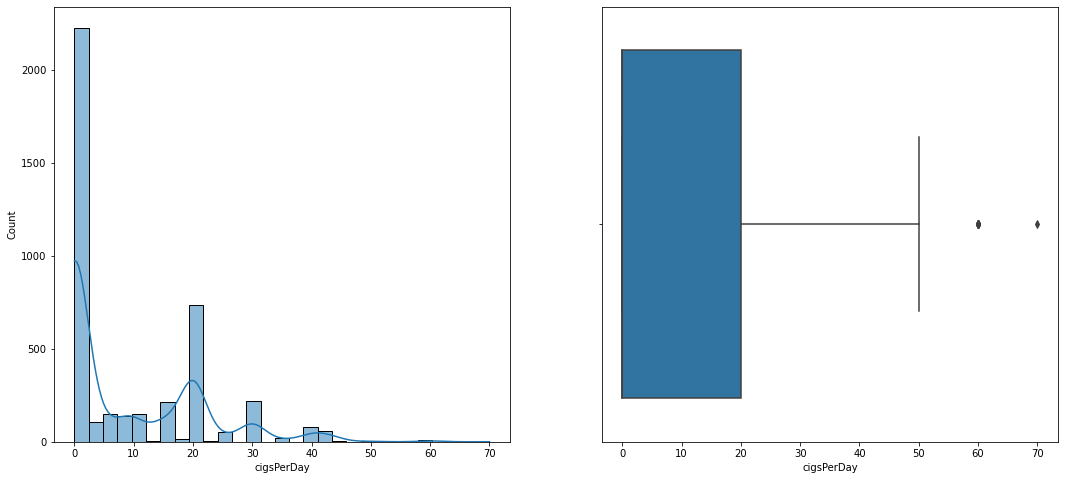

In [81]:
fig, my_grid = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
g1 = sns.histplot(x=data['cigsPerDay'],kde=True,data=data,ax=my_grid[0])
g2 = sns.boxplot(x=data['cigsPerDay'],data=data,ax=my_grid[1])

In [ ]:
# From the graph we can see that there are outliers, so we have to choose a method to fill the null values that does not have
# the effect of outliers.
# If the "current smoker column" is zero, which means the person is not a smoker right now, we can replace the correspondong NaN
# values in "cigars per day" column with zero

In [82]:
# First we can check if any missing values in "cigars per day" have corresponding value of zero in "current smoker"

cperday_nullindex = data[data['cigsPerDay'].isnull()].index

In [83]:
cperday_nullindex

Int64Index([ 131,  139, 1046, 1292, 1347, 1451, 1497, 1610, 1625, 1870, 1963,
            1980, 2405, 2513, 2542, 3021, 3034, 3094, 3106, 3108, 3156, 3177,
            3309, 3432, 3579, 3715, 3847, 3924, 3942],
           dtype='int64')

In [84]:
#We can check the values of current smoker in the corresponding index

corresponding_currentsmoker = []
for i in cperday_nullindex:
    corresponding_currentsmoker.append(data['currentSmoker'][i])
    

In [85]:
corresponding_currentsmoker

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [ ]:
# As we can see all the missing values in the "Cigsperday" column have the "Current smoker" column value as 1
# Now we can fill the null values using the median of "Cigs per day"
# But we don't have to use the entire "Cigs per day" column, we can use the values where the "Current smoker" values is 1

In [89]:
# Columns where the "currentsmoker" value is 1

data_currentsmoker_yes = data[data['currentSmoker'] == 1]

In [90]:
# Median and mode of "cigsperday" where "current smoker" is 1

print(data_currentsmoker_yes['cigsPerDay'].median())

20.0


In [91]:
# Now we can replace the NaN values in "cigsperday" using 20

data['cigsPerDay'].fillna(20,inplace=True)

In [92]:
data.isnull().sum()

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

###### Missing Values in BP Meds Column

<AxesSubplot:xlabel='BPMeds', ylabel='count'>

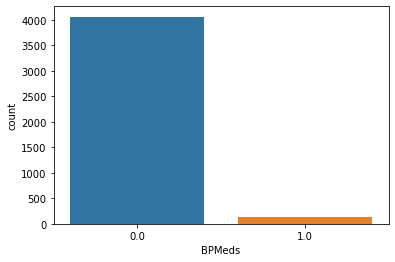

In [93]:
sns.countplot(x = data['BPMeds'])

In [ ]:
# We can fill the missing values in BP Meds using data in Systolic and Diastolic BP columns
# If the values of both bp columns are over a threshold value, we can consider as the person is taking bp medicine
# Doctors reccomend bp medicines for patients at high blood pressure stage 2(140/90) and hypertensive crisis(180/120)
# as shown in the image below.

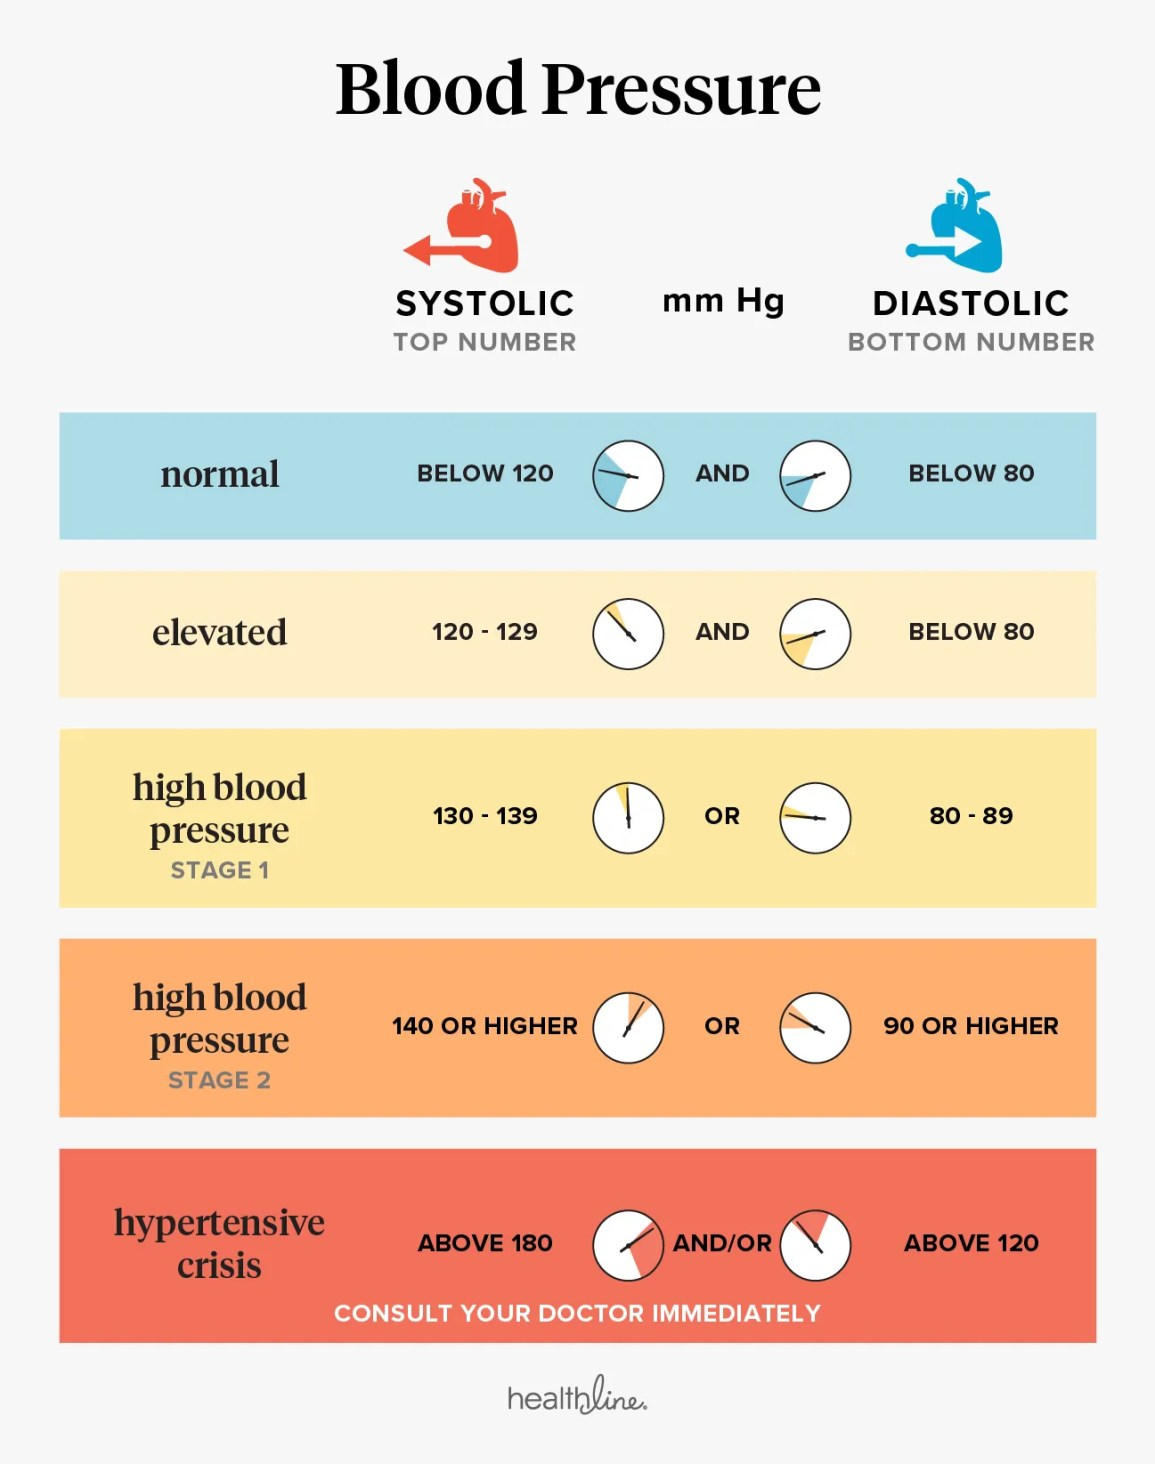

In [94]:
BP_nullindex = data[data['BPMeds'].isnull()].index
BP_nullindex

Int64Index([  49,   77,  193,  245,  314,  395,  421,  765,  769,  797,  998,
            1002, 1044, 1104, 1122, 1177, 1206, 1284, 1301, 1566, 1573, 1616,
            1721, 1857, 1861, 1913, 1983, 1985, 1986, 2002, 2074, 2120, 2173,
            2181, 2367, 2608, 2645, 2738, 2835, 2943, 3226, 3313, 3373, 3375,
            3526, 3644, 3737, 3791, 3816, 4008, 4139, 4162, 4235],
           dtype='int64')

In [95]:
for i in BP_nullindex:
    if (data['sysBP'][i] > 140 or data['diaBP'][i] > 90):
        data.loc[i,'BPMeds'] = 1.0  
    else:
        data.loc[i,'BPMeds'] = 0.0

In [96]:
data.isnull().sum()

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

###### Missing Values in Glucose

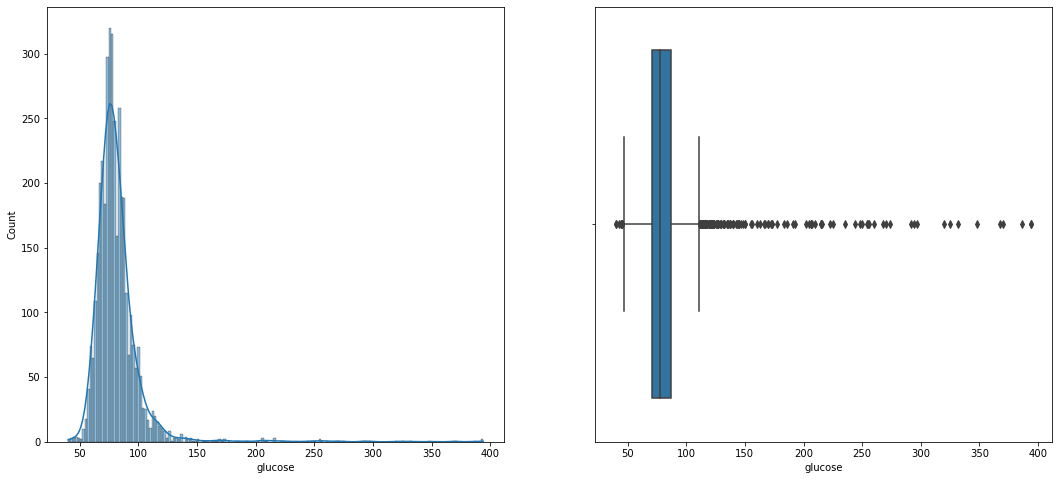

In [97]:
fig, my_grid = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
g1 = sns.histplot(x=data['glucose'],kde=True,data=data,ax=my_grid[0])
g2 = sns.boxplot(x=data['glucose'],data=data,ax=my_grid[1])

In [ ]:
# From the graph we can see that there are outliers, so we have to choose a method to fill the null values that does not have
# effect of outliers.
# The glucose value of a person is related to whether he/she has diabetes or not
# We can groupby the median of glucose using diabetes 

In [98]:
data.groupby('diabetes').median()['glucose']

diabetes
0     78.0
1    145.0
Name: glucose, dtype: float64

In [99]:
def impute_glucose(cols):
    dia=cols[0]
    glu=cols[1]
    if pd.isnull(glu):
        if dia == 0:
            return 78
        else:
            return 145
    else:
        return glu

data['glucose'] = data[['diabetes','glucose']].apply(impute_glucose,axis=1)

In [100]:
data.isnull().sum()

male                0
age                 0
education           0
currentSmoker       0
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol            50
sysBP               0
diaBP               0
BMI                19
heartRate           1
glucose             0
TenYearCHD          0
dtype: int64

###### Missing Values in BMI

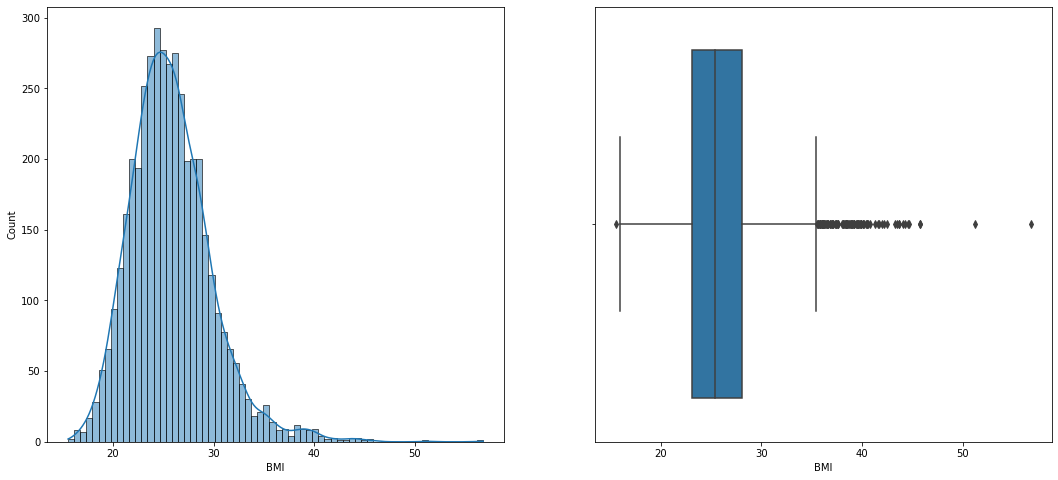

In [101]:
fig, my_grid = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
g1 = sns.histplot(x=data['BMI'],kde=True,data=data,ax=my_grid[0])
g2 = sns.boxplot(x=data['BMI'],data=data,ax=my_grid[1])

In [ ]:
# From the graph we can see that there are outliers, so we have to choose a method to fill the null values that does not have
# effect of outliers.
# We can fill the missing values uaing the median of the column

In [102]:
data['BMI'].fillna(data['BMI'].median(),inplace=True)

###### Missing Values in Total Cholestrol

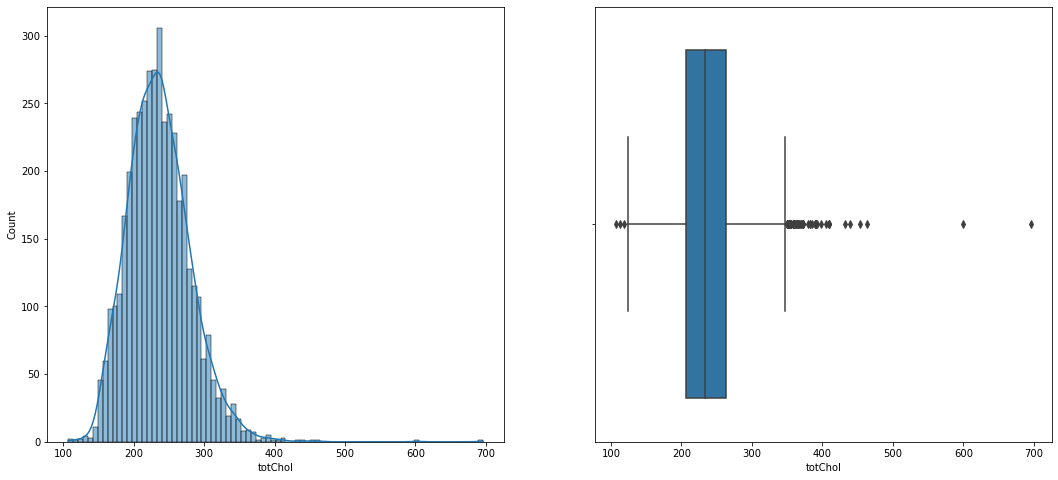

In [103]:
fig, my_grid = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
g1 = sns.histplot(x=data['totChol'],kde=True,data=data,ax=my_grid[0])
g2 = sns.boxplot(x=data['totChol'],data=data,ax=my_grid[1])

In [ ]:
# From the graph we can see that there are outliers, so we have to choose a method to fill the null values that does not have
# effect of outliers.
# We can fill the missing values uaing the median of the column

In [104]:
data['totChol'].fillna(data['totChol'].median(),inplace=True)

###### Missing Values in Heart Rate

In [105]:
# There is only 1 missing value in this column,we can use mode of the column to fill null values
data['heartRate'].fillna(data["heartRate"].mode()[0],inplace=True)

In [106]:
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
# All the null values have been successfully handled.

### Outlier Handling

In [107]:
# Creating a new dataframe to select all the contionus column 
data_outliers = data[['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate', 'glucose']].copy()

Text(0.5, 0, 'Continous Features')

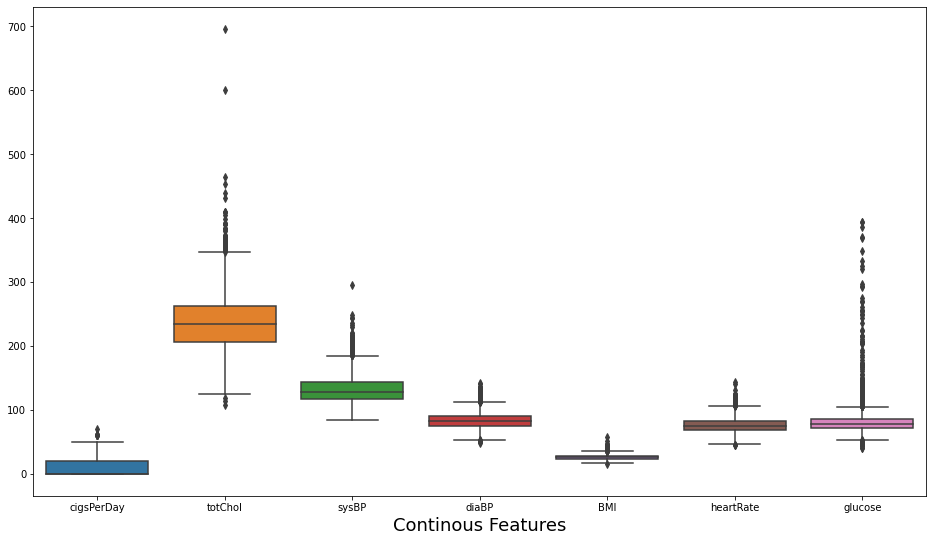

In [108]:
plt.figure(figsize=(16,9))
sns.boxplot(data=data_outliers)
plt.xlabel("Continous Features",fontsize=18)

> Theoretically, the outliers in each of these column can be handled using a number of methods<br>
But here,most our columns are health related and it is very feasible for these columns to have these extreme values<br>
For example a cholestrol level of 700 and a glucose level at 400 eventhough are uncommon, they are very realistic values<br>
We shall do handling of outliers in ciggars per day column alone


###### Handling Outliers in ciggrates per day column

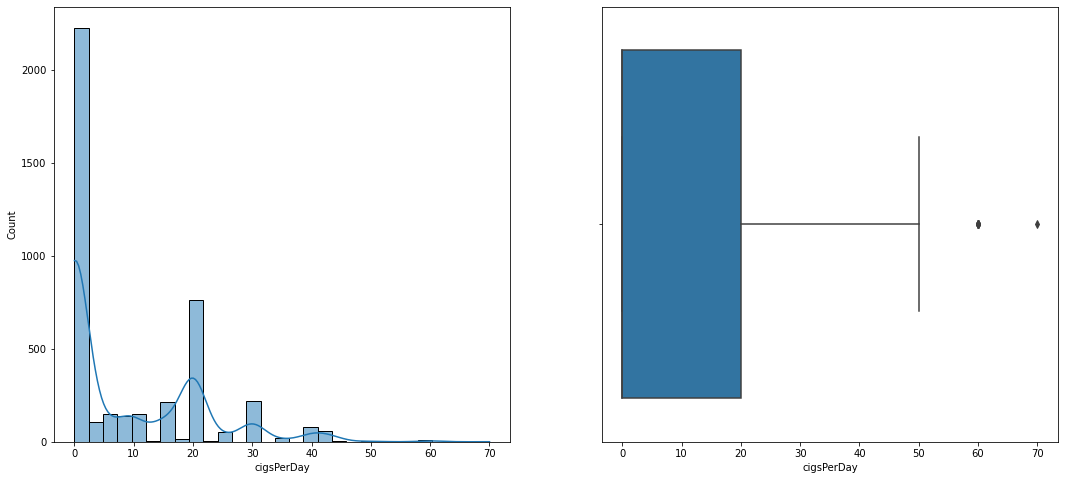

In [109]:
fig, my_grid = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
g1 = sns.histplot(x=data['cigsPerDay'],kde=True,data=data,ax=my_grid[0])
g2 = sns.boxplot(x=data['cigsPerDay'],data=data,ax=my_grid[1])

In [ ]:
# We can cap the outliers using IQR method

In [110]:
Q1 = data['cigsPerDay'].quantile(0.25)
Q3 = data['cigsPerDay'].quantile(0.75)

In [111]:
print(Q1,Q3)

0.0 20.0


In [112]:
IQR = Q3-Q1
IQR

20.0

In [113]:
LL=Q1-1.5*IQR #LL - Lower Limit
UL=Q3+1.5*IQR #UL - Upper Limit
print(LL,UL)

-30.0 50.0


In [114]:
# removing the outliers
data['cigsPerDay'] = np.where(data['cigsPerDay']>UL,UL,np.where(data['cigsPerDay']<LL,LL,data['cigsPerDay']))

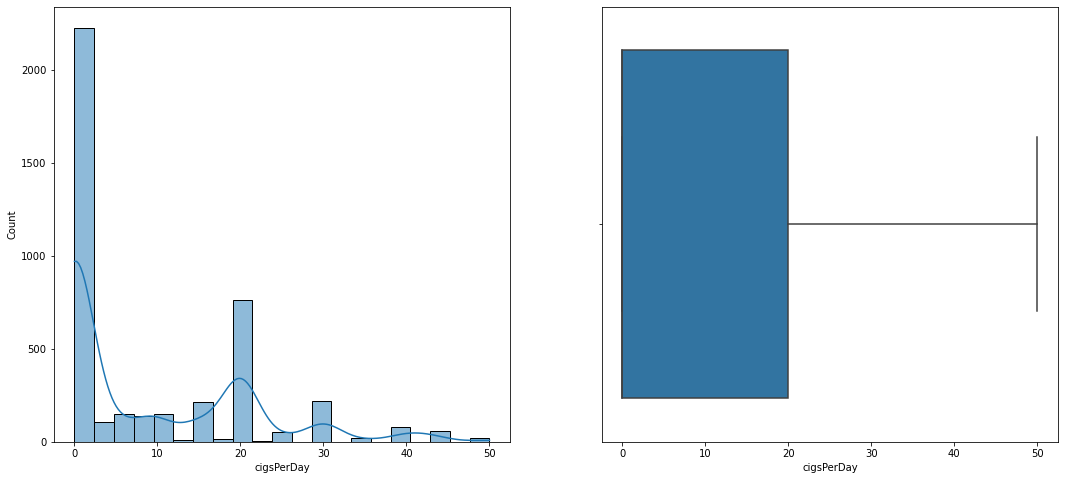

In [115]:
fig, my_grid = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
g1 = sns.histplot(x=data['cigsPerDay'],kde=True,data=data,ax=my_grid[0])
g2 = sns.boxplot(x=data['cigsPerDay'],data=data,ax=my_grid[1])

### Feature Engineering

###### Mean Arterial Pressure

> https://www.healthline.com/health/mean-arterial-pressure<br>
 According to the article, we can generate a mean arterial pressure column using Systolic and Diastolic blood pressure (SBP and DBP) columns<br>
The formula to find the mean arterial pressure,MAP = (SBP + 2* DBP)/3

In [116]:
data['MAP'] = (data['sysBP'] + (2* data['diaBP']))/3

###### Weight

> https://en.wikipedia.org/wiki/Body_mass_index<br>
According to the above article,We can generate a weight classification column using the BMI of a person<br>
Major BMI classifications are underweight (under 18.5 kg/m2), normal weight (18.5 to 24.9), overweight (25 to 29.9), and obese (30 or more)

In [117]:
def Weight(a):
    if a<18.5:
        return "Underweight"
    if 18.5<=a<24.9:
        return "Normal"
    elif 24.9<=a<29.9:
        return "Overweight"
    elif a>29.9:
        return "Obese"

In [118]:
data["Weight"]=data["BMI"].apply(lambda x: Weight(x))

In [119]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,MAP,Weight
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,82.000000,Overweight
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,94.333333,Overweight
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,95.833333,Overweight
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,113.333333,Overweight
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,99.333333,Normal


## Exploratory Data Analysis 

### Univariate Analysis

In [125]:
sns.set(style="whitegrid",palette='Set2')

Distribution of boolean variables
 “1” means “Yes”, “0” means “No”


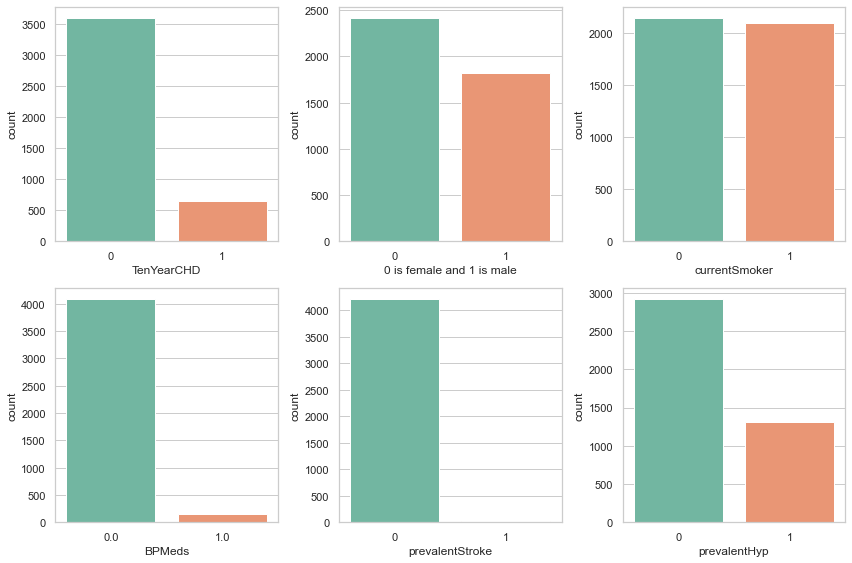

In [127]:
print("Distribution of boolean variables")
print(' “1” means “Yes”, “0” means “No”')
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(12,8))
sns.countplot(data.TenYearCHD,ax=axes[0,0])
sns.countplot(data.male,ax=axes[0,1])
axes[0,1].set_xlabel("0 is female and 1 is male")
sns.countplot(data.currentSmoker,ax=axes[0,2])
sns.countplot(data.BPMeds,ax=axes[1,0])
sns.countplot(data.prevalentStroke,ax=axes[1,1])
sns.countplot(data.prevalentHyp,ax=axes[1,2])
plt.tight_layout()

Distribution of continuous variables


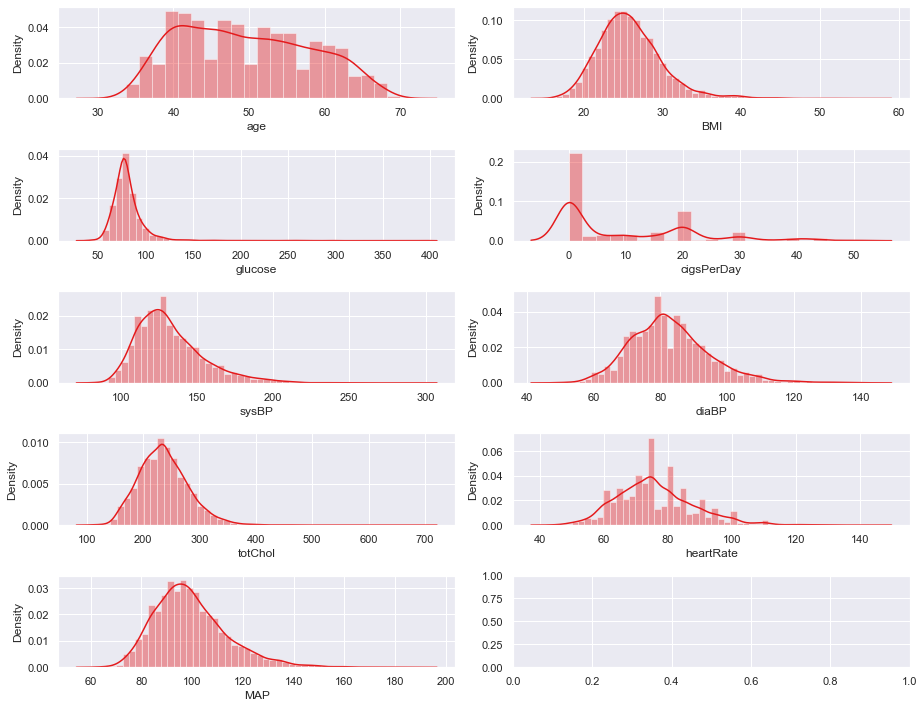

In [134]:
sns.set(style="darkgrid",palette='Set1')
print("Distribution of continuous variables")
fig,axes = plt.subplots(nrows=5,ncols=2,figsize=(13,10))
sns.distplot(data.age,ax=axes[0,0])
sns.distplot(data.BMI,ax=axes[0,1])
sns.distplot(data.glucose,ax=axes[1,0])
sns.distplot(data.cigsPerDay,ax=axes[1,1])
sns.distplot(data.sysBP,ax=axes[2,0])
sns.distplot(data.diaBP,ax=axes[2,1])
sns.distplot(data.totChol,ax=axes[3,0])
sns.distplot(data.heartRate,ax=axes[3,1])
sns.distplot(data.MAP,ax=axes[4,0])
plt.tight_layout()

### Bivariate Analysis

Text(0.5, 1.0, 'Coronary Heart Disease in Men and Women')

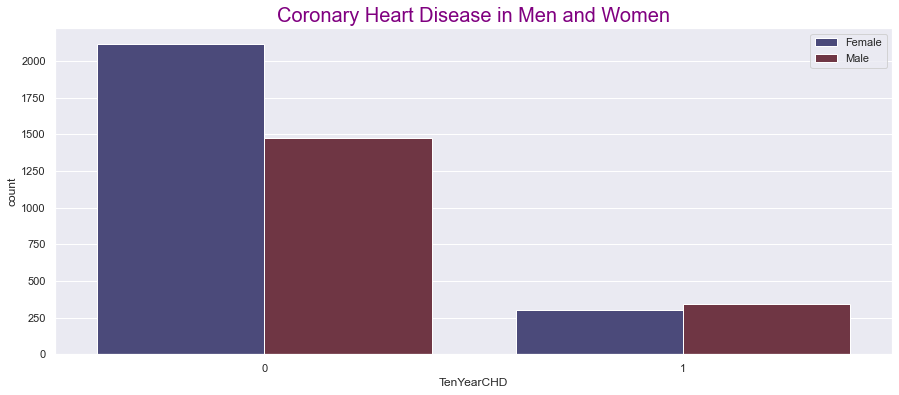

In [418]:
# Coronary Hear Disease in Men and Women
plt.figure(figsize=(15,6))
x=sns.countplot(x=data['TenYearCHD'],hue=data['male'],data=data,palette='icefire')
L=plt.legend()
L.get_texts()[0].set_text('Female')
L.get_texts()[1].set_text('Male')
plt.title("Coronary Heart Disease in Men and Women",fontsize=20,color='purple')

>Men are most susceptible to CHD's tham women

Text(0.5, 1.0, 'Level of Education vs CHD')

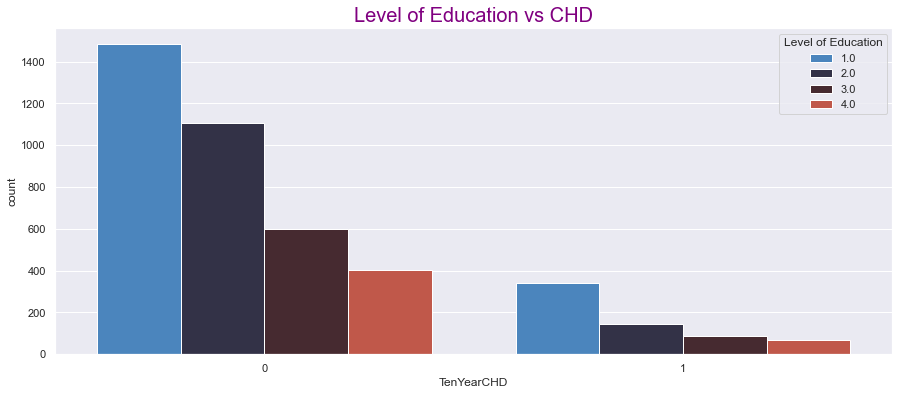

In [172]:
# Level of Education vs CHD
plt.figure(figsize=(15,6))
x=sns.countplot(x=data['TenYearCHD'],hue=data['education'],data=data,palette='icefire')
L=plt.legend()
L.set_title('Level of Education')
plt.title("Level of Education vs CHD",fontsize=20,color='purple')

> Coronary Heart diseases are most found among the people with lesser level of education

Text(0.5, 1.0, 'Age,Cholestrol vs CHD')

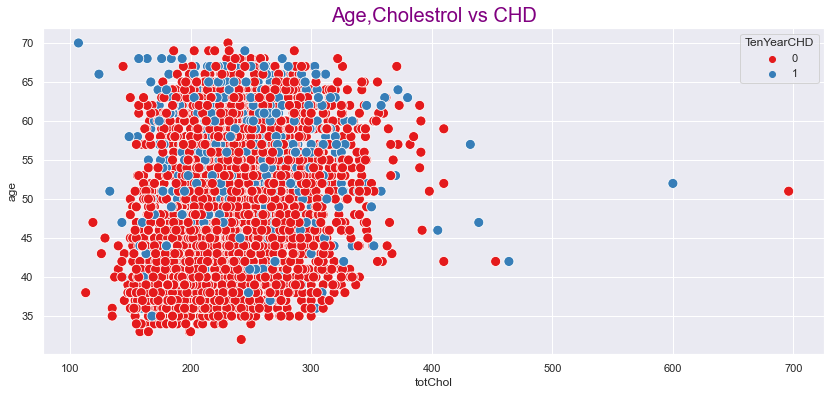

In [246]:
# Age,Cholestrol vs CHD
plt.figure(figsize=(14,6))
pt=sns.scatterplot(y=data['age'],x=data['totChol'],hue=data['TenYearCHD'],s=100)
plt.title("Age,Cholestrol vs CHD",fontsize=20,color='purple')


> Coronary Heart Disease are most in people above 50 years old and cholestrol level above 200 

Text(0.5, 0.98, 'MAP,BMI,Diabetes vs CHD')

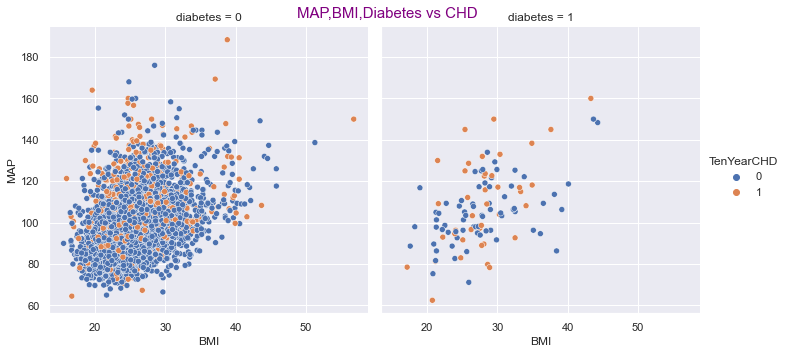

In [279]:
# MAP,BMI,Diabetes vs CHD
g = sns.relplot(y=data['MAP'],x=data['BMI'],hue=data['TenYearCHD'],col=data['diabetes'],height=5,)
g.fig.suptitle("MAP,BMI,Diabetes vs CHD",color ='purple',fontsize=15)

> Body Mass Index and Pressure has a linear relation with Cornonary Heart Disease.<br>
People with diabetes are in higher risk of CHD, even if their BMI and MAP are optimal.

Text(0.5, 1.0, 'Distribution of Cholestrol among different Weight categories')

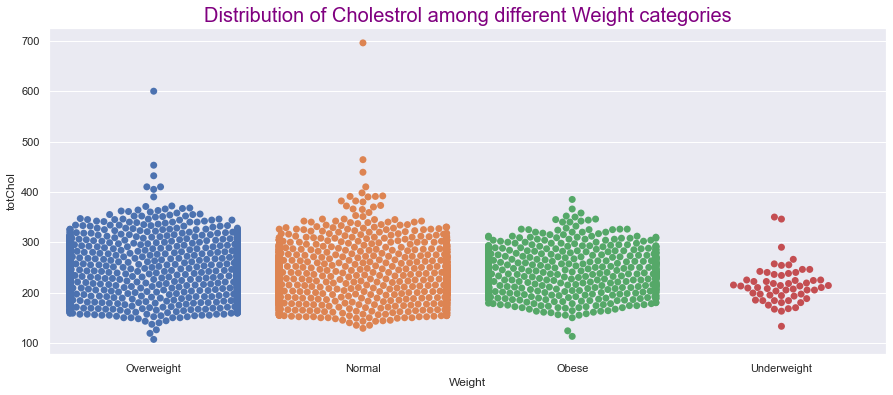

In [303]:
# Distribution of Cholestrol among different Weight categories
plt.figure(figsize=(15,6))
sns.swarmplot(x=data['Weight'],y=data['totChol'],data=data,size=7)
plt.title("Distribution of Cholestrol among different Weight categories",fontsize=20,color='purple')


> People in obese category have the most of the cholestrol distribution between 190 and 300<br>
This high cholestrol will lead to more CHD's among obese people

<Figure size 1008x720 with 0 Axes>

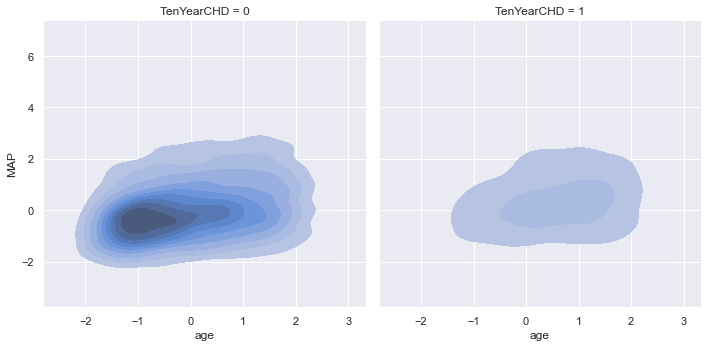

In [420]:
plt.figure(figsize=(14,10))
sns.displot(x=data['age'],y=data['MAP'] ,data=data,palette='Accent',kind='kde',fill=True,col=data['TenYearCHD'])

> With increase in Age and MAP, there is a higher chance a person is having CHD

## Encoding

In [ ]:
# Only the weight column in our data requires enoding 

In [321]:
data['Weight'] = data['Weight'].map({'Underweight': 1, 'Normal': 2,'Overweight':3,'Obese':4})

In [322]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,MAP,Weight
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,82.000000,3
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,94.333333,3
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,95.833333,3
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,113.333333,3
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,99.333333,2


## Feature Reduction

In [ ]:
# We can drop features with high correlation

In [323]:
corr = data.corr()

<AxesSubplot:>

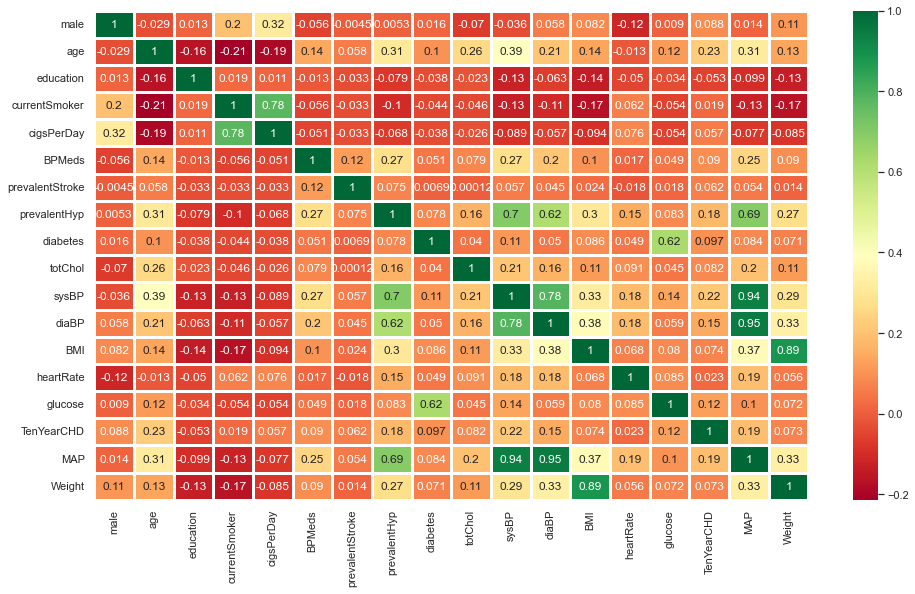

In [324]:
plt.figure(figsize=(16,9))
sns.heatmap(data=corr,cmap='RdYlGn',annot=True,linewidths=3)

In [ ]:
# Due to their high correltaion we can drop sysBP,diaBP and Current Smoker Columns

In [325]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'MAP', 'Weight'],
      dtype='object')

In [326]:
data.drop(['currentSmoker','sysBP','diaBP'],axis=1,inplace=True)

## Standardisation

In [331]:
data.describe()

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,MAP,Weight
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,1.954696,9.047664,0.034214,0.005899,0.310524,0.025720,236.689476,25.800205,75.878716,81.666824,0.151958,99.379778,2.672015
std,0.495022,8.572160,1.018510,11.792882,0.181801,0.076587,0.462763,0.158316,44.327427,4.071041,12.025185,22.947712,0.359023,14.438873,0.713023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,15.540000,44.000000,40.000000,0.000000,62.500000,1.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,23.080000,68.000000,72.000000,0.000000,89.500000,2.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,25.400000,75.000000,78.000000,0.000000,97.333333,3.000000
75%,1.000000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,28.037500,83.000000,85.000000,0.000000,107.125000,3.000000
max,1.000000,70.000000,4.000000,50.000000,1.000000,1.000000,1.000000,1.000000,696.000000,56.800000,143.000000,394.000000,1.000000,188.333333,4.000000


In [ ]:
# We can standardise our contionus numerical columns using standard Scaler

In [338]:
from sklearn.preprocessing import StandardScaler

In [341]:
data['MAP'].dtypes

dtype('float64')

In [349]:
df_con=['cigsPerDay', 'totChol','BMI','heartRate', 'glucose', 'MAP','age']
stds=StandardScaler()
for i in df_con:
    data[i]=pd.DataFrame(stds.fit_transform(data[[i]]))

In [352]:
data.describe()

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,MAP,Weight
count,4238.000000,4.238000e+03,4238.000000,4.238000e+03,4238.000000,4238.000000,4238.000000,4238.000000,4.238000e+03,4.238000e+03,4.238000e+03,4.238000e+03,4238.000000,4.238000e+03,4238.000000
mean,0.429212,1.126334e-16,1.954696,1.463619e-16,0.034214,0.005899,0.310524,0.025720,-8.262490e-17,5.223654e-16,-1.380706e-16,3.460606e-16,0.151958,-4.002275e-16,2.672015
std,0.495022,1.000118e+00,1.018510,1.000118e+00,0.181801,0.076587,0.462763,0.158316,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,0.359023,1.000118e+00,0.713023
min,0.000000,-2.051644e+00,1.000000,-7.673045e-01,0.000000,0.000000,0.000000,0.000000,-2.926062e+00,-2.520588e+00,-2.651309e+00,-1.815943e+00,0.000000,-2.554502e+00,1.000000
25%,0.000000,-8.849392e-01,1.000000,-7.673045e-01,0.000000,0.000000,0.000000,0.000000,-6.924178e-01,-6.682630e-01,-6.552620e-01,-4.213041e-01,0.000000,-6.843293e-01,2.000000
50%,0.000000,-6.824590e-02,2.000000,-7.673045e-01,0.000000,0.000000,0.000000,0.000000,-6.068012e-02,-9.831699e-02,-7.308163e-02,-1.598093e-01,0.000000,-1.417483e-01,3.000000
75%,1.000000,7.484475e-01,3.000000,9.288339e-01,0.000000,0.000000,1.000000,0.000000,5.710575e-01,5.496281e-01,5.922673e-01,1.452680e-01,0.000000,5.364778e-01,3.000000
max,1.000000,2.381834e+00,4.000000,3.473041e+00,1.000000,1.000000,1.000000,1.000000,1.036299e+01,7.615608e+00,5.582384e+00,1.361225e+01,1.000000,6.161426e+00,4.000000


## Modeling

##### Splitting the dataset to X and y

In [354]:
X = data.drop(['TenYearCHD'],axis=1)
y = data['TenYearCHD']

In [357]:
# Splitting to train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=45,test_size=0.2)

### Logistic Regression

In [359]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [360]:
LR.fit(X_train,y_train)

LogisticRegression()

In [364]:
y_predicted = LR.predict(X_test)

In [363]:
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix

In [365]:
# Metrics of the model
print("accuracy score is ",accuracy_score(y_predicted,y_test))
cm = confusion_matrix(y_predicted,y_test)
print("f1 score is",f1_score(y_predicted,y_test))

accuracy score is  0.8502358490566038
f1 score is 0.1476510067114094


In [366]:
cm

array([[710, 124],
       [  3,  11]], dtype=int64)

### KNN

In [367]:
from sklearn.neighbors import KNeighborsClassifier

In [374]:
# To find the optimal value of k,

accuracy = []
neighbors = np.arange(3,20)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(X_train,y_train)
    y_predicted = classifier.predict(X_test)
    acc = accuracy_score(y_predicted,y_test)
    accuracy.append(acc)

In [375]:
accuracy

[0.8278301886792453,
 0.8372641509433962,
 0.8349056603773585,
 0.8419811320754716,
 0.839622641509434,
 0.8431603773584906,
 0.8419811320754716,
 0.8431603773584906,
 0.8419811320754716,
 0.8419811320754716,
 0.8408018867924528,
 0.8431603773584906,
 0.8419811320754716,
 0.8431603773584906,
 0.8466981132075472,
 0.8443396226415094,
 0.8443396226415094]

<AxesSubplot:>

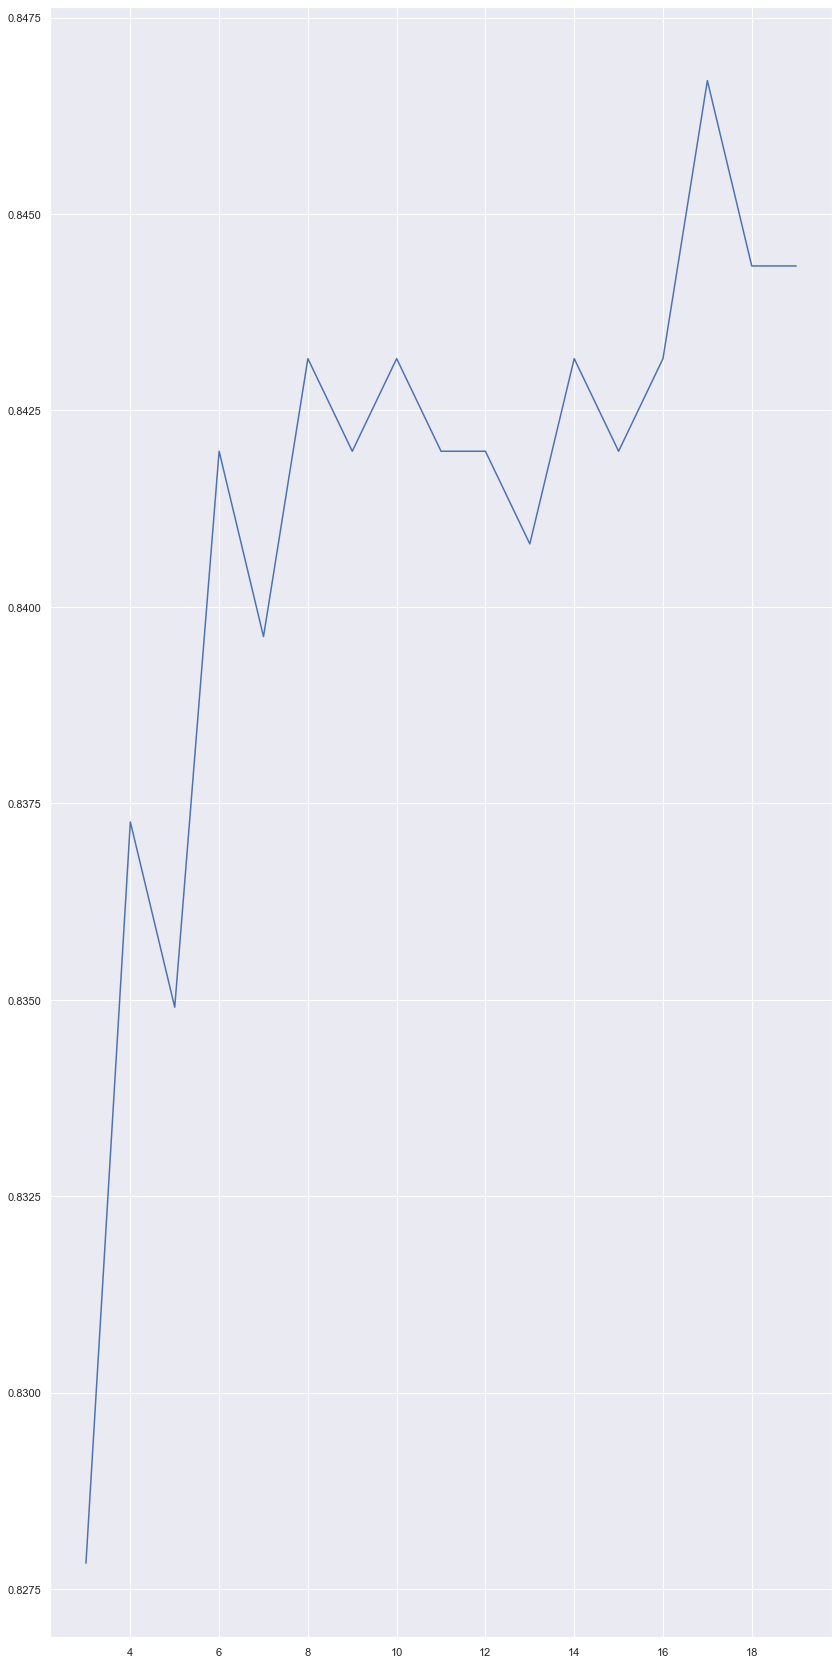

In [376]:
sns.lineplot(x=neighbors,y=accuracy)

In [ ]:
# 17 is the best value of k

In [377]:
classifier = KNeighborsClassifier(n_neighbors=17, metric='minkowski')
classifier.fit(X_train,y_train)
y_predicted= classifier.predict(X_test)

In [378]:
print("accuracy score is ",accuracy_score(y_predicted,y_test))
cm = confusion_matrix(y_predicted,y_test)
print("f1 score is",f1_score(y_predicted,y_test))

accuracy score is  0.8466981132075472
f1 score is 0.08450704225352113


In [379]:
cm

array([[712, 129],
       [  1,   6]], dtype=int64)

### SVC

In [381]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf', C=10)

In [382]:
svc.fit(X_train,y_train)
y_predicted = svc.predict(X_test)

In [383]:
print("accuracy score is ",accuracy_score(y_predicted,y_test))
cm = confusion_matrix(y_predicted,y_test)
print("f1 score is",f1_score(y_predicted,y_test))

accuracy score is  0.8455188679245284
f1 score is 0.108843537414966


In [384]:
cm

array([[709, 127],
       [  4,   8]], dtype=int64)

### Random Forest

In [385]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()

In [386]:
forest.fit(X_train,y_train)
y_predicted = forest.predict(X_test)

In [387]:
print("accuracy score is ",accuracy_score(y_predicted,y_test))
cm = confusion_matrix(y_predicted,y_test)
print("f1 score is",f1_score(y_predicted,y_test))

accuracy score is  0.8455188679245284
f1 score is 0.108843537414966


In [388]:
cm

array([[709, 127],
       [  4,   8]], dtype=int64)

### Decision Tree

In [389]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [390]:
tree.fit(X_train,y_train)
y_predicted = tree.predict(X_test)

In [391]:
print("accuracy score is ",accuracy_score(y_predicted,y_test))
cm = confusion_matrix(y_predicted,y_test)
print("f1 score is",f1_score(y_predicted,y_test))

accuracy score is  0.7476415094339622
f1 score is 0.218978102189781


In [392]:
cm

array([[604, 105],
       [109,  30]], dtype=int64)

### XGBoost

In [395]:
#pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [396]:
import xgboost 

In [397]:
from xgboost import XGBClassifier
boost = XGBClassifier()

In [398]:
boost.fit(X_train,y_train)
y_predicted = boost.predict(X_test)

In [399]:
print("accuracy score is ",accuracy_score(y_predicted,y_test))
cm = confusion_matrix(y_predicted,y_test)
print("f1 score is",f1_score(y_predicted,y_test))

accuracy score is  0.8372641509433962
f1 score is 0.21590909090909088


In [400]:
cm

array([[691, 116],
       [ 22,  19]], dtype=int64)

>Logistis Regression has the highest accuracy and the lowest missclassifications in the confusion matrix.<br>
 We can choose this model to conduct hyper parameter tuning.

## Hyper Parameter Tuning

In [ ]:
# Parameter tuning using Grid SearchCV

In [404]:
from sklearn.model_selection import GridSearchCV

In [411]:
scores = []
clf =  GridSearchCV(LogisticRegression(solver='liblinear',multi_class='auto'), {'C': [1,5,10]}, cv=5, return_train_score=False)
clf.fit(X_train, y_train)
scores.append({'model': "Logistic Regression",'best_score': clf.best_score_,'best_params': clf.best_params_})
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,Logistic Regression,0.854277,{'C': 1}


In [412]:
LR = LogisticRegression(C=1)  #Hyperparameter tuning

In [413]:
LR.fit(X_train,y_train)
y_predicted = LR.predict(X_test)

In [422]:
print("accuracy score is ",accuracy_score(y_predicted,y_test))
cm = confusion_matrix(y_predicted,y_test)
print("f1 score is",f1_score(y_predicted,y_test))

accuracy score is  0.8502358490566038
f1 score is 0.1476510067114094


In [426]:
cm

array([[710, 124],
       [  3,  11]], dtype=int64)

> * Logistic Regression is the best model for our data, it has an accuracy of 85%
<br/><br/> 
> * Our Model also have very few false negatives, which means very very few patient will get a wrong result saying they <br> don't have the risk of CHD
